**PROCESAMIENTO DEL LENGUAJE NATURAL: TRABAJO PRACTICO FINAL**

Alumna: Sol Kidonakis

**EJERCICIO 1**

**Carga de librerias**

In [ ]:
!pip install -U langchain langchain-community openai pandas neo4j xmltodict
!pip install PyMuPDF
!pip install chromadb
!pip install --upgrade huggingface_hub
!pip install transformers
!pip install torch
!pip install SPARQLWrapper





     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.0/990.0 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.8/328.8 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.5/293.5 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.5/373.5 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 12.4 MB/s eta 0:00:00
  Attempting uninstal

In [ ]:
import fitz  # PyMuPDF para trabajar con PDFs
import pandas as pd
from langchain.document_loaders import PubMedLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings
from neo4j import GraphDatabase
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import fitz
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from langchain.text_splitter import RecursiveCharacterTextSplitter
import numpy as np
import gensim.downloader as api
from SPARQLWrapper import SPARQLWrapper, JSON
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from transformers import AutoModelForCausalLM, AutoTokenizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import joblib
import chromadb

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Documentos PDF y CSV**

In [ ]:
# Función para extraer el contenido de los documentos PDF
def extract_text_from_pdf(pdf_file):
    try:
        doc = fitz.open(pdf_file)
        text = ""
        for page in doc:
            text += page.get_text()
        return text
    except Exception as e:
        print(f"Error al abrir el archivo PDF {pdf_file}: {e}")
        return ""

# Función para limpiar el texto
def clean_text(text):
    # Eliminar caracteres especiales y números
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenizar el texto
    tokens = word_tokenize(text, language='spanish')
    # Eliminar stopwords
    stop_words = set(stopwords.words('spanish'))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    # Reconstruir el texto limpio
    clean_text = ' '.join(tokens)
    return clean_text.strip()

# Nombres de los archivos PDF
pdf_files = ['Argentina.pdf', 'Brasil.pdf']

# Extraer y limpiar el texto de cada PDF
pdf_texts = {}
for pdf_file in pdf_files:
    raw_text = extract_text_from_pdf(pdf_file)
    cleaned_text = clean_text(raw_text)
    pdf_texts[pdf_file] = cleaned_text

# Mostrar los primeros caracteres de cada texto (opcional)
for pdf_file, text in pdf_texts.items():
    print(f"Texto extraído y limpio de {pdf_file}:")
    print(text[:500])  # Mostrar solo los primeros 500 caracteres
    print()

# Ruta del archivo CSV
csv_file = 'WorldPopulation2023.csv'

# Cargar datos desde el CSV
population_data = pd.read_csv(csv_file)

# Mostrar los primeros registros para verificar la carga correcta
print("Primeros registros del CSV:")
print(population_data.head())


Texto extraído y limpio de Argentina.pdf:
Repblica Argentinaa Bandera Escudo Lema Unin Libertadb Himno Himno Nacional Argentino Problemas reproducir archivo Territorio controlado Repblica Argentina verde oscuro territorio reclamado controlado verde claro Capital ciudad ms poblada Buenos Aires S Idioma oficial Espaol Cooficiales Guaran cooficial Corrientes Qom mocov wich cooficial Chaco Hablados Lenguas Argentina Gentilicio Argentino Forma gobierno Repblica federal presidencialista Presidente Javier Milei Vicepresidente Victoria Villarru

Texto extraído y limpio de Brasil.pdf:
Repblica Federativa Brasil Repblica Federativa do Brasil portugus Bandera Escudo Lema Ordem progresso espaol Orden progreso Himno Hino Nacional Brasileiro portugus Himno Nacional Brasileo Problemas reproducir archivo Capital Brasilia S Ciudad ms poblada So Paulo S Idioma oficial Portugus Hablados Lenguas indgenas Brasil Gentilicio Brasileo Brasilero Forma gobierno Repblica federal presidencialista Presidente Luiz 

In [ ]:
# Dividir el texto en fragmentos de longitud específica usando Langchain
chunk_size = 1000
chunk_overlap = 200

splitter = RecursiveCharacterTextSplitter(chunk_size=chunk_size, chunk_overlap=chunk_overlap)

processed_texts = {}
for pdf_file, text in pdf_texts.items():
    chunks = splitter.split_text(text)
    processed_texts[pdf_file] = chunks

# Mostrar los primeros fragmentos de texto procesados (opcional)
for pdf_file, chunks in processed_texts.items():
    print(f"Fragmentos procesados de {pdf_file}:")
    for chunk in chunks[:3]:  # Mostrar solo los primeros 3 fragmentos
        print(chunk[:200])  # Mostrar solo los primeros 200 caracteres
    print()


Fragmentos procesados de Argentina.pdf:
Repblica Argentinaa Bandera Escudo Lema Unin Libertadb Himno Himno Nacional Argentino Problemas reproducir archivo Territorio controlado Repblica Argentina verde oscuro territorio reclamado controlado
km Lnea costa km Punto ms alto Aconcagua Argentina Argentina oficialmente Repblica Argentinai pas soberano Amrica Sur ubicado extremo sur sudeste dicho subcontinente Adopta forma gobierno republicana 
Uruguay ocano Atlntico oeste sur continental Chile aguas atlnticas Mar Hoces segundo pas mayor ndice Desarrollo Humano IDH regin detrs vecino Chile Aplica modelos salud educacin pblica garantizan acce

Fragmentos procesados de Brasil.pdf:
Repblica Federativa Brasil Repblica Federativa do Brasil portugus Bandera Escudo Lema Ordem progresso espaol Orden progreso Himno Hino Nacional Brasileiro portugus Himno Nacional Brasileo Problemas re
Federativa Brasil Repblica Federativa do Brasil pas soberano Amrica Sur comprende mitad oriental continente grupos peq

In [ ]:
import numpy as np
from gensim.models import KeyedVectors
import gensim.downloader as api
from sklearn.decomposition import PCA

# Cargar el modelo Word2Vec
model = api.load('word2vec-google-news-300')

def get_mean_embedding(text, model):
    words = text.split()
    embeddings = []
    for word in words:
        try:
            embeddings.append(model[word])
        except KeyError:
            continue
    if embeddings:
        return np.mean(embeddings, axis=0).tolist()
    return None


embeddings = {}

# Procesar e insertar embeddings
for pdf_file, chunks in processed_texts.items():
    for i, chunk in enumerate(chunks):
        embedding = get_mean_embedding(chunk, model)
        if embedding is not None:
            doc_id = f"{pdf_file}_chunk_{i}"
            embeddings[doc_id] = embedding

print(embeddings)


{'Argentina.pdf_chunk_0': [-0.06910966336727142, -0.012847900390625, 0.11713546514511108, 0.0931294783949852, 0.045731764286756516, -0.07935900241136551, -0.05589861795306206, -0.08477754145860672, -0.009809053502976894, 0.03472863882780075, -0.03442109003663063, -0.05846717953681946, -0.08525516092777252, 0.05124977231025696, 0.019984709098935127, 0.0976969376206398, 0.098978191614151, 0.18722377717494965, 0.04483736306428909, 0.1009165421128273, 0.007121746428310871, -0.10700079053640366, 0.04935499280691147, 0.07569347321987152, -0.0021773118060082197, -0.11238332837820053, -0.07823768258094788, -0.026424309238791466, -0.08879221230745316, -0.028055435046553612, 0.059116560965776443, 0.037969835102558136, 0.03331032767891884, -0.0469568707048893, -0.07464952021837234, -0.06493299454450607, -0.025430727750062943, 0.01878396049141884, 0.015463951043784618, -0.09725326299667358, -0.019748393446207047, 0.05081729218363762, 0.11415530741214752, 0.11117514222860336, -0.022372905164957047,

**Almacenamiento en ChromaDB**

In [ ]:
# Configurar ChromaDB
client = chromadb.Client()

# Crear o recuperar la colección
collection = client.get_or_create_collection("collection")

# Función para dividir en lotes
def batch(iterable, n=1):
    l = len(iterable)
    for ndx in range(0, l, n):
        yield iterable[ndx:min(ndx + n, l)]

# Guardar los embeddings en lotes más pequeños
batch_size = 100

# Iterar sobre cada archivo de PDF en processed_texts
for pdf_file in processed_texts.keys():
    # Crear lista para los documentos y embeddings
    document_batch = []
    embedding_batch = []
    id_batch = []

    # Iterar sobre cada fragmento correspondiente al archivo
    for i in range(len(processed_texts[pdf_file])):
        doc_id = f"{pdf_file}_chunk_{i}"  # ID del documento
        if doc_id in embeddings:
            document_batch.append(processed_texts[pdf_file][i])
            embedding_batch.append(embeddings[doc_id])
            id_batch.append(doc_id)

    if document_batch:
        # Dividir en lotes y añadir a la colección
        for doc_batch, emb_batch, id_batch_chunk in zip(
                batch(document_batch, batch_size),
                batch(embedding_batch, batch_size),
                batch(id_batch, batch_size)):

            collection.add(
                documents=doc_batch,
                embeddings=emb_batch,  # No se usa tolist()
                ids=id_batch_chunk
            )

        print(f"Documentos del archivo {pdf_file} añadidos correctamente.")
    else:
        print(f"No se encontraron embeddings para {pdf_file}.")

Documentos del archivo Argentina.pdf añadidos correctamente.


Documentos del archivo Brasil.pdf añadidos correctamente.


In [ ]:
# Prompt para filtrar elementos relevantes
prompt = "Andorra"

# Consulta dinámica para filtrar datos relevantes
filtered_df = population_data[population_data['Country'].str.contains(prompt, case=False)]

# Mostrar los resultados filtrados
print(filtered_df)

   Rank  Country  Population2023 YearlyChange  NetChange  Density(P/Km²)  \
4   202  Andorra           80088       0.33 %        264             170   

   Land Area(Km²)  Migrants(net)  Fert.Rate  MedianAge UrbanPop% WorldShare  
4             470            200        1.1       43.0      85 %     0.00 %  


**Base de datos de Grafos**

In [ ]:
sparql = SPARQLWrapper("http://dbpedia.org/sparql")
query = """
    PREFIX dbo: <http://dbpedia.org/ontology/>
    SELECT ?country ?population
    WHERE {
        ?country a dbo:Country ;
                 dbo:populationTotal ?population .
    }
    LIMIT 500
"""
sparql.setQuery(query)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

# Generar triadas
triples = []
for result in results["results"]["bindings"]:
    country = result["country"]["value"]
    population = result["population"]["value"]

    # Triada (Sujeto, Predicado, Objeto)
    triple = (country, "dbo:populationTotal", population)
    triples.append(triple)

# Imprimir triadas
for triple in triples:
    print(triple)


('http://dbpedia.org/resource/Cabeça_do_Cachorro', 'dbo:populationTotal', '50000')
('http://dbpedia.org/resource/Cambodia', 'dbo:populationTotal', '16713015')
('http://dbpedia.org/resource/Cameroon', 'dbo:populationTotal', '29321637')
('http://dbpedia.org/resource/Canada', 'dbo:populationTotal', '38929902')
('http://dbpedia.org/resource/Canda', 'dbo:populationTotal', '900')
('http://dbpedia.org/resource/Cangnan_County', 'dbo:populationTotal', '1184600')
('http://dbpedia.org/resource/Caribbean_Community', 'dbo:populationTotal', '18482141239251864')
('http://dbpedia.org/resource/Caribbean_Free_Trade_Association', 'dbo:populationTotal', '4438068')
('http://dbpedia.org/resource/Carriacou_and_Petite_Martinique', 'dbo:populationTotal', '6081')
('http://dbpedia.org/resource/Cascadia_(independence_movement)', 'dbo:populationTotal', '17250000')
('http://dbpedia.org/resource/Principality_of_Sealand', 'dbo:populationTotal', '2')
('http://dbpedia.org/resource/Principality_of_Seborga', 'dbo:populat

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Ejemplo de prompt
prompt = "Buscar países con población mayor a 1000000"

# Tokenización y POS tagging
tokens = word_tokenize(prompt)
pos_tags = pos_tag(tokens)

# Lematización de sustantivos (NN)
lemmatizer = WordNetLemmatizer()
filtered_tokens = [(lemmatizer.lemmatize(word), pos) for word, pos in pos_tags if pos.startswith('NN')]

# Construir términos de consulta basados en sustantivos lematizados
query_terms = [word for word, _ in filtered_tokens]
print("Términos de consulta:", query_terms)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Términos de consulta: ['Buscar', 'con', 'población', 'mayor']


**Modelo LLM**

In [ ]:
model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

def generate_response(prompt):
    inputs = tokenizer(prompt, return_tensors="pt")
    outputs = model.generate(inputs.input_ids, max_length=100, num_return_sequences=1)
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)

    return response

# Ejemplo de uso
prompt = "¿Cuál es la capital de Argentina?"
response = generate_response(prompt)
print(response)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token.As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


¿Cuál es la capital de Argentina?

The answer is yes.

The capital of Argentina is Buenos Aires.

The capital of Argentina is Buenos Aires.

The capital of Argentina is Buenos Aires.

The capital of Argentina is Buenos Aires.

The capital of Argentina is Buenos Aires.

The capital of Argentina is Buenos Aires.

The capital of Argentina is Buenos Aires.

The capital of Argentina is Buenos Aires.




**Claificador**

In [ ]:
def classify_with_llm(question):


    # Definir palabras clave asociadas a cada archivo
    keywords = {
        "Argentina.pdf": ["Argentina", "Buenos Aires"],
        "Brasil.pdf": ["Brasil", "São Paulo"],
        "WorldPopulation.csv": ["población", "demografía", "World Population"]
    }

    # Inicializar un diccionario para contar coincidencias
    scores = {file: 0 for file in keywords}

    # Contar coincidencias para cada archivo
    for file, words in keywords.items():
        for word in words:
            if word.lower() in question.lower():
                scores[file] += 1

    # Determinar el archivo con la mayor puntuación
    best_match = max(scores, key=scores.get)

    # Mapear el archivo a una etiqueta
    labels = {
        "Argentina.pdf": 1,
        "Brasil.pdf": 2,
        "WorldPopulation.csv": 3
    }

    return labels.get(best_match, 0)  # Etiqueta 0 para ninguna coincidencia clara

def evaluate_llm_classifier(test_data):
    y_true = [item['label'] for item in test_data]
    y_pred = [classify_with_llm(item['text']) for item in test_data]

    accuracy = accuracy_score(y_true, y_pred)
    print(f"LLM Classifier Accuracy: {accuracy}")
    print(f"LLM Classifier Classification Report:\n{classification_report(y_true, y_pred)}")
    print(f"LLM Classifier Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

# Definir datos de prueba con etiquetas
test_data = [
    {'text': '¿Cuál es la población de Argentina?', 'label': 1},
    {'text': '¿Dónde está Buenos Aires?', 'label': 1},
    {'text': '¿Qué es el PIB de Brasil?', 'label': 2},
    {'text': '¿Cuál es la población mundial?', 'label': 3}
]

# Evaluar el clasificador LLM
evaluate_llm_classifier(test_data)


LLM Classifier Accuracy: 1.0
LLM Classifier Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

LLM Classifier Confusion Matrix:
[[2 0 0]
 [0 1 0]
 [0 0 1]]


 La precisión perfecta se debe a que estoy utilizando un conjunto de datos muy pequeño y específico, y he diseñado el clasificador de manera que se alinee bien con esos datos.

**Modelo de Regresion Logistica entrenado con ejemplos y Embeddings**

In [ ]:
import gensim.downloader as api

# Descargar y cargar el modelo Word2Vec preentrenado
word2vec_model = api.load('word2vec-google-news-300')


In [ ]:
# Función para obtener el embedding promedio de un texto
def get_mean_embedding(text):
    words = text.split()  # Dividir el fragmento en palabras
    embeddings = [word2vec_model[word] for word in words if word in word2vec_model]  # Obtener embeddings de las palabras en el modelo
    if embeddings:
        return np.mean(embeddings, axis=0)  # Calcular el embedding promedio
    return None


In [ ]:


# Asignar etiquetas a los fragmentos
labels = []
processed_embeddings = []

for pdf_file, chunks in processed_texts.items():
    label = 1 if "Argentina" in pdf_file else 0
    for chunk in chunks:
        embedding = get_mean_embedding(chunk)
        if embedding is not None:
            processed_embeddings.append(embedding)
            labels.append(label)

# Incluir datos del CSV en el clasificador
for index, row in population_data.iterrows():
    text = ' '.join(row.astype(str))  # Combinar todos los valores de la fila en un solo string
    embedding = get_mean_embedding(text)
    if embedding is not None:
        processed_embeddings.append(embedding)
        labels.append(2)

# Convertir a arrays de NumPy
X = np.array(processed_embeddings)
y = np.array(labels)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión logística
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Evaluar el modelo
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Guardar el modelo entrenado
joblib.dump(clf, 'logistic_regression_model.pkl')

# Cargar y usar el modelo guardado
loaded_clf = joblib.load('logistic_regression_model.pkl')
new_prediction = loaded_clf.predict(X_test)
print(f"Nueva predicción: {new_prediction}")


Accuracy: 0.9423076923076923
              precision    recall  f1-score   support

           0       0.93      0.80      0.86        35
           1       0.91      0.97      0.94        75
           2       1.00      1.00      1.00        46

    accuracy                           0.94       156
   macro avg       0.95      0.92      0.93       156
weighted avg       0.94      0.94      0.94       156

Nueva predicción: [0 2 1 2 1 1 2 1 1 0 2 1 1 1 2 2 0 1 1 1 1 0 1 2 1 1 1 1 0 2 0 2 1 1 1 0 0
 1 2 2 2 2 2 0 2 2 1 1 1 1 1 2 1 0 2 1 0 1 1 1 1 1 1 1 2 0 1 1 2 1 0 0 1 1
 2 1 0 1 2 1 2 1 1 2 0 2 2 1 0 1 1 1 1 1 2 0 0 1 0 2 1 1 1 1 1 0 2 0 1 1 2
 1 2 0 1 2 0 1 1 2 2 0 2 2 1 2 0 1 2 2 2 1 1 1 1 2 1 1 2 0 2 1 2 0 1 1 0 1
 2 1 1 1 0 1 2 1]


Accuracy (Precisión Global)
Valor: 0.94 (o 94.2%)
El porcentaje de predicciones correctas en relación con el total de predicciones realizadas. En este caso, el clasificador acertó el 94.2% de las veces.

Precision (Precisión)
La proporción de verdaderos positivos entre todas las instancias que fueron clasificadas como positivas.
Para cada clase:
Clase 0: 0.93 (93%)
Clase 1: 0.91 (91%)
Clase 2: 1.00 (100%)


Recall (Sensibilidad o Exhaustividad)
La proporción de verdaderos positivos entre todas las instancias que pertenecen a la clase.
Para cada clase:
Clase 0: 0.80 (80%)
Clase 1: 0.97 (97%)
Clase 2: 1.00 (100%)



F1-Score
La media armónica de precisión y recall. Es una medida que combina ambos para proporcionar un equilibrio entre ellos.
Para cada clase:
Clase 0: 0.86
Clase 1: 0.94
Clase 2: 1.00



Macro Average (Promedio Macro)
El promedio de las métricas (precisión, recall, F1-score) calculadas para cada clase sin tener en cuenta el desequilibrio en el número de instancias por clase.
Resultados:
Precisión: 0.95
Recall: 0.92
F1-Score: 0.93
Significado: Ofrece una vista general del rendimiento del clasificador sin considerar el número de instancias en cada clase.


Weighted Average (Promedio Ponderado)
El promedio de las métricas ponderadas por el número de instancias en cada clase.
Resultados:
Precisión: 0.94
Recall: 0.94
F1-Score: 0.94
Significado: Este promedio tiene en cuenta el número de instancias en cada clase, proporcionando una métrica general más representativa del rendimiento del clasificador.

In [ ]:
# Función para predecir la clase de una nueva pregunta
def classify_question(question):
    embedding = get_mean_embedding(question)
    if embedding is not None:
        embedding = embedding.reshape(1, -1)  # Redimensionar para el clasificador
        predicted_label = clf.predict(embedding)[0]
        return predicted_label
    else:
        return "No se pudo generar un embedding para la pregunta."

# Ejemplo de uso
new_question = "¿Cuál es la población de Argentina?"
predicted_label = classify_question(new_question)
print(f"La pregunta pertenece a la categoría: {predicted_label}")

La pregunta pertenece a la categoría: 0


**Implementacion del ChatBot**

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
gpt2_model = GPT2LMHeadModel.from_pretrained(model_name)


In [ ]:
# Cargar datos del CSV
df = pd.read_csv("WorldPopulation2023.csv")


client = chromadb.Client()
collection = client.get_or_create_collection(name="collection")


In [ ]:

# Función para buscar en ChromaDB
def search_chromadb(query, collection, model):
    query_embedding = get_mean_embedding(query, model)
    if query_embedding is None:
        return []
    results = collection.query(query_embeddings=[query_embedding])
    return results

# Función para generar la respuesta
def generate_response(prompt):
    inputs = tokenizer(prompt, return_tensors="pt")
    outputs = gpt2_model.generate(**inputs, max_length=100, max_new_tokens=80)
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response

# Función para buscar en el CSV
def search_csv(query, df):
    results = df[df.apply(lambda row: query.lower() in row.astype(str).str.lower().to_list(), axis=1)]
    return results

# Función para buscar en el Grafo
def search_graph(query, uri, user, password):
    query = f"""
        PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
        SELECT ?s ?o
        WHERE {{
            ?s ?p ?o .
            FILTER(CONTAINS(STR(?o), "{message}"))
        }}
    """
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    results = sparql.query().convert()

    if results["results"]["bindings"]:
        return results["results"]["bindings"]
    return None


# Función del chatbot para responder a las consultas
def chatbot_response(query, model):
    # Buscar en ChromaDB
    chromadb_results = search_chromadb(query, collection, model)
    if chromadb_results:
        return generate_response(f"Informacion relevante en ChromaDB: {chromadb_results}")

    # Buscar en el CSV
    csv_results = search_csv(query, df)
    if not csv_results.empty:
        return generate_response(f"Informacion relevante en CSV: {csv_results}")

    # Buscar en el Grafo
    graph_results = search_graph(query, "bolt://localhost:7687", "neo4j", "IlvVpDxEfEtgkP8_CJOXXjAB2PoMhE3yA49DPTD2FyU")
    if graph_results:
        return generate_response(f"Informacion relevante en Graph Database: {graph_results}")

    return "No se ha encontrado informacion."

**ACLARACION**

Tuve problemas para realizar el Chatbot,las consultas no me estan funcionando. Tengo que profundizar en esta parte.

**EJERCICIO 2**


Rerank es una técnica para reordenar los resultados obtenidos de una búsqueda inicial o recuperación de documentos para mejorar la relevancia final. Primero se recuperan resultados preliminares basados en un modelo de recuperación (ej. búsqueda por palabra clave) y luego se aplican técnicas de reranking (ej. modelos de clasificación o regresión) para ajustar el orden de los resultados según un criterio más refinado.

Impacto en el Desempeño:
La técnica de reranking mejora la precisión al asegurar que los resultados más relevantes sean priorizados, lo cual puede llevar a respuestas más precisas y útiles para el usuario.

Aplicación:
Implementaría reranking en la fase donde los resultados se recuperan de las bases de datos (tanto tabulares como de grafos). Después de obtener los documentos relevantes, aplicar un modelo de reranking para ajustar la relevancia final antes de generar la respuesta del chatbot.

**Diagrama**

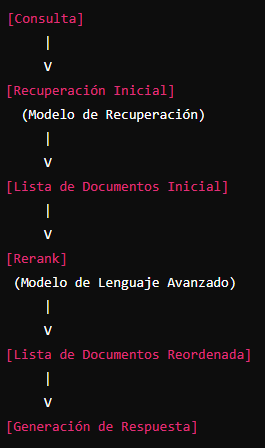